**Objective**



*   Build a model using automated machine learning package "PyCaret"
*   Track Model Experiments using MLFlow
*   Look into Model Explainability
*   Deploy Model using API
*   Monitor Model & Data for Model/Data Drift


**Problem Statement**

Build a churn model for an e-commerce company using relevant data containing user information and behaviour.

**Data Description**



*   CustomerID : Unique customer ID
*   Churn : Churn Flag
*   Tenure : Tenure of customer in organization
*   PreferredLoginDevice : Preferred login device of customer
*   CityTier : City tier
*   WarehouseToHome : Distance in between warehouse to home of customer
*   PreferredPaymentMode : Preferred payment method of customer
*   Gender : Gender of customer
*   HourSpendOnApp : Number of hours spend on mobile application or website
*   NumberOfDeviceRegistered
Total number of deceives is registered on particular customer
*   PreferedOrderCat : Preferred order category of customer in last month
*   SatisfactionScore : Satisfactory score of customer on service
*   MaritalStatus : Marital status of customer
*   NumberOfAddress : Total number of added added on particular customer
*   Complain : Any complaint has been raised in last month
*   OrderAmountHikeFromlastYear : Percentage increases in order from last year
*   CouponUsed : Total number of coupon has been used in last month
*   OrderCount : Total number of orders has been places in last month
*   DaySinceLastOrder : Day Since last order by customer
*   CashbackAmount : Average cashback in last month

**Code**

In [1]:
!pip install sweetviz
!pip install pycaret
!pip install shap
!pip install mlflow
!pip install fastapi
!pip install uvicorn
!pip install pyngrok
!pip install evidently

You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\manho\\Anaconda3\\Lib\\site-packages\\~-ipy\\.libs\\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for pyngrok: filename=pyngrok-5.0.5-py3-none-any.whl size=19246 sha256=8cd346923d5378c6fab78befb73ffbc40acc5f29a8b09d3235b3da266d603e4d
  Stored in directory: c:\users\manho\appdata\local\pip\cache\wheels\ae\90\7d\ffada5b5eef2e643d07a755053acb0c0ad64a74b534a8ad5f2
Successfully built pyngrok


You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\manho\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
# Importing packages
import numpy as np
import pandas as pd 

# Automated EDA
import sweetviz as sv

# AutoML package
from pycaret.classification import *

# MLFlow Experiment Tracking/Model Registry
import mlflow
from  mlflow.tracking import MlflowClient
from mlflow.entities import ViewType

# Model/Drift Monitoring
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, CatTargetDriftTab
from evidently.tabs import ClassificationPerformanceTab, ProbClassificationPerformanceTab

# API Creation
from fastapi import FastAPI
import uvicorn
import nest_asyncio
nest_asyncio.apply()


In [2]:
# Read Data
churn_df = pd.read_excel('https://github.com/Manoj15/BMSIT_ML_Session/blob/main/E_Commerce_Dataset.xlsx?raw=true', sheet_name='E Comm')
churn_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# Split Data for experimentation and for testing real time data/model monitoring
msk = np.random.rand(len(churn_df)) < 0.8

experiment_churn_df = churn_df[msk]

monitor_churn_df= churn_df[~msk]

In [7]:
# Some EDA
#analyzing the dataset
churn_report = sv.analyze(experiment_churn_df)
#display the report
churn_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
experiment_churn_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [4]:
# initializing setup for AutoML
churn_ml_df = setup(data = experiment_churn_df, target = 'Churn', ignore_features = ['CustomerID'], log_experiment = True, experiment_name = 'churn_model')

,Description,Value
0,session_id,8818
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4503, 20)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
# Run & Compare all baseline models and select top 10
top10 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9387,0.9505,0.7399,0.8708,0.7976,0.7619,0.7670,1.5340
lightgbm,Light Gradient Boosting Machine,0.9343,0.9556,0.7226,0.8579,0.7819,0.7438,0.7491,0.5330
catboost,CatBoost Classifier,0.9270,0.9500,0.6691,0.8604,0.7500,0.7083,0.7175,3.1940
rf,Random Forest Classifier,0.9229,0.9554,0.5774,0.9333,0.7098,0.6686,0.6961,0.3780
et,Extra Trees Classifier,0.9223,0.9485,0.5467,0.9678,0.6957,0.6557,0.6923,0.3770
gbc,Gradient Boosting Classifier,0.9043,0.9229,0.5773,0.7954,0.6649,0.6110,0.6239,0.6930
dt,Decision Tree Classifier,0.9024,0.8210,0.6995,0.7073,0.7021,0.6439,0.6447,0.0560
ada,Ada Boost Classifier,0.8910,0.9075,0.5410,0.7310,0.6198,0.5581,0.5678,0.2420
lr,Logistic Regression,0.8835,0.8949,0.5086,0.7094,0.5891,0.5237,0.5353,0.6480
lda,Linear Discriminant Analysis,0.8781,0.8849,0.5103,0.6780,0.5790,0.5098,0.5186,0.1010


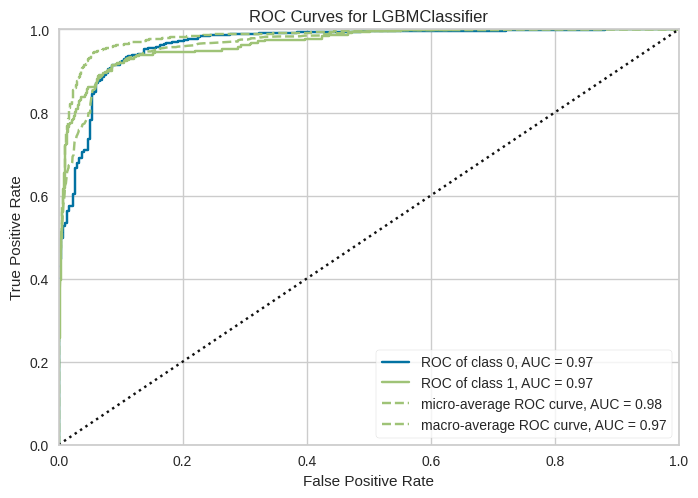

In [ ]:
# Plot Models ROC

plot_model(top10)

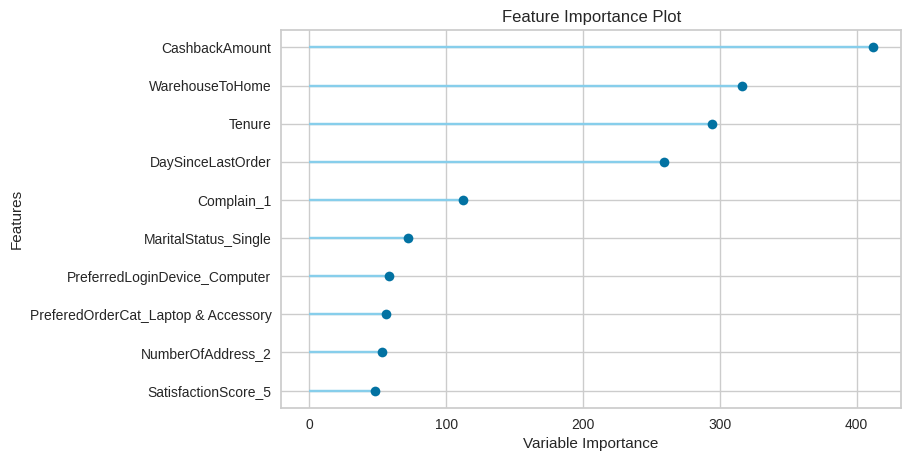

In [ ]:
# check feature importance
plot_model(top10, plot = 'feature')

In [ ]:
# Save Pipeline and Model
# finalize the model
final_best = finalize_model(top10)
# save model to disk
save_model(final_best, 'churn-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['CustomerID'],
                                       id_columns=['CustomerID'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numer...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [5]:
# View all MLflow experiments to get experiment id for "churn_model"

client = MlflowClient()
experiments = client.list_experiments()
experiments

[<Experiment: artifact_location='file:///C:/Users/manho/Documents/temp/CountForecasting/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Default', tags={}>,
 <Experiment: artifact_location='file:///C:/Users/manho/Documents/temp/CountForecasting/mlruns/1', experiment_id='1', lifecycle_stage='active', name='churn_model', tags={}>]

In [6]:
# Get Model with the best accuracy

run = MlflowClient().search_runs(
  experiment_ids="1",
  filter_string="",
  run_view_type=ViewType.ACTIVE_ONLY,
  order_by=["metrics.Accuracy DESC"]
)[0]
run

<Run: data=<RunData: metrics={'AUC': 0.9505,
 'Accuracy': 0.9387,
 'F1': 0.7976,
 'Kappa': 0.7619,
 'MCC': 0.767,
 'Prec': 0.8708,
 'Recall': 0.7399,
 'TT': 1.534}, params={'base_score': '0.5',
 'booster': 'gbtree',
 'colsample_bylevel': '1',
 'colsample_bynode': '1',
 'colsample_bytree': '1',
 'gamma': '0',
 'gpu_id': '-1',
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': '0.300000012',
 'max_delta_step': '0',
 'max_depth': '6',
 'min_child_weight': '1',
 'missing': 'nan',
 'monotone_constraints': '()',
 'n_estimators': '100',
 'n_jobs': '-1',
 'num_parallel_tree': '1',
 'objective': 'binary:logistic',
 'random_state': '4305',
 'reg_alpha': '0',
 'reg_lambda': '1',
 'scale_pos_weight': '1',
 'subsample': '1',
 'tree_method': 'auto',
 'use_label_encoder': 'True',
 'validate_parameters': '1',
 'verbosity': '0'}, tags={'Run ID': '8ab24d82cf494d5f8b812960afb4a0ab',
 'Run Time': '15.75',
 'Source': 'compare_models',
 'URI': 'dc7ee4f2',
 'USI': 'e46a',
 'mlflow.

In [7]:
# load model
pipeline = load_model(run.info.artifact_uri.replace('file:///','')+'/model/model')
# print pipeline
print(pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['CustomerID'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_co

In [8]:
# generate predictions
predictions = predict_model(pipeline, data=monitor_churn_df)
predictions.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Label,Score
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,1,0.9402
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,1,0.9941
24,50025,1,14.0,Computer,1,14.0,Debit Card,Male,2.0,5,...,Single,3,0,15.0,0.0,1.0,3.0,206.50,0,0.9992
27,50028,0,NaN,Phone,3,12.0,E wallet,Male,2.0,3,...,Divorced,3,1,20.0,0.0,4.0,5.0,123.06,0,0.9831
31,50032,0,0.0,Mobile Phone,1,13.0,Credit Card,Male,2.0,4,...,Divorced,3,0,17.0,1.0,1.0,0.0,161.32,0,0.9216


In [48]:
# Using pipeline stored in mlflow to preprcoess monitoring data
pipeline[:23].transform(monitor_churn_df)

,Tenure,WarehouseToHome,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,...,DaySinceLastOrder_18.0,DaySinceLastOrder_2.0,DaySinceLastOrder_3.0,DaySinceLastOrder_4.0,DaySinceLastOrder_5.0,DaySinceLastOrder_6.0,DaySinceLastOrder_7.0,DaySinceLastOrder_8.0,DaySinceLastOrder_9.0,DaySinceLastOrder_not_available
0,4.000000,6.0,159.929993,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10.220788,8.0,120.900002,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,14.000000,14.0,206.500000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,10.220788,12.0,123.059998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31,0.000000,13.0,161.320007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,12.000000,17.0,178.429993,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5612,14.000000,8.0,192.279999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5626,13.000000,13.0,224.910004,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5627,1.000000,11.0,186.419998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Preprocess Experiment & Monitoring Data
experiment_df = pipeline[:23].transform(experiment_churn_df)
monitor_df = pipeline[:23].transform(monitor_churn_df)

In [58]:
data_drift_db = Dashboard(tabs=[DataDriftTab])
data_drift_db.calculate(experiment_df, monitor_df, column_mapping = None)

In [60]:
data_drift_db.save("reports/data_drift.html")

In [62]:
from IPython.display import IFrame

IFrame(src='reports/data_drift.html', width=700, height=600)

In [66]:
# Set target and predictions columns for drift monitoring
experiment_df['target'] = experiment_churn_df['Churn']
monitor_df['target'] = monitor_churn_df['Churn']
experiment_df['prediction'] = predict_model(pipeline, data=monitor_churn_df)['Label']
monitor_df['prediction'] = predict_model(pipeline, data=monitor_churn_df)['Label']

experiment_df.target = experiment_df.target.apply(lambda x: 'Yes' if 1 else 'No')
experiment_df.prediction = experiment_df.prediction.apply(lambda x: 'Yes' if 1 else 'No')

monitor_df.target = monitor_df.target.apply(lambda x: 'Yes' if 1 else 'No')
monitor_df.prediction = monitor_df.prediction.apply(lambda x: 'Yes' if 1 else 'No')

column_mapping = {}

column_mapping['target'] = 'target'
column_mapping['prediction'] = 'prediction'
column_mapping['numerical_features'] = pipeline[:23].transform(experiment_churn_df).columns


experiment_df.reset_index(inplace = True, drop = True)
monitor_df.reset_index(inplace = True, drop = True)


In [ ]:
model_performance = Dashboard(tabs=[ClassificationPerformanceTab])
model_performance.calculate(experiment_df, monitor_df, column_mapping = column_mapping)

In [68]:
model_performance.save('reports/classification_performance.html')

In [69]:

IFrame(src='reports/classification_performance.html', width=700, height=600)

Credits to Moez Ali & team for providing such an awesome package.
References :

*   https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6
*   https://towardsdatascience.com/build-with-pycaret-deploy-with-fastapi-333c710dc786

Thanks to Evidently for a package much needed

* https://github.com/evidentlyai/evidently

## TODO: 
1. Integrate FastAPI & Evidently
2. Implement more features with different data
3. Write Medium article